<a href="https://colab.research.google.com/github/Parimala-15/ShadowFox/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [8]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Data Collection and Processing

In [9]:
# loading the dataset to pandas DataFrame
loan_dataset = pd.read_csv('/content/drive/MyDrive/ ML Internship/Loan Prediction/train_u6lujuX_CVtuZ9i (1).csv')

In [10]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [11]:
loan_dataset.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [12]:
loan_dataset.shape

(614, 13)

In [13]:
loan_dataset.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [14]:
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
loan_dataset.isnull().dropna()

Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0      False   False    False       False      False          False   
1      False   False    False       False      False          False   
2      False   False    False       False      False          False   
3      False   False    False       False      False          False   
4      False   False    False       False      False          False   
..       ...     ...      ...         ...        ...            ...   
609    False   False    False       False      False          False   
610    False   False    False       False      False          False   
611    False   False    False       False      False          False   
612    False   False    False       False      False          False   
613    False   False    False       False      False          False   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0              False              False        True             False   
1              False              False       False             False   
2              False              False       False             False   
3              False              False       False             False   
4              False              False       False             False   
..               ...                ...         ...               ...   
609            False              False       False             False   
610            False              False       False             False   
611            False              False       False             False   
612            False              False       False             False   
613            False              False       False             False   

     Credit_History  Property_Area  Loan_Status  
0             False          False        False  
1             False          False        False  
2             False          False        False  
3             False          False        False  
4             False          False        False  
..              ...            ...          ...  
609           False          False        False  
610           False          False        False  
611           False          False        False  
612           False          False        False  
613           False          False        False  

[614 rows x 13 columns]

In [16]:
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
# label encoding
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

/tmp/ipython-input-17-474101102.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)


In [18]:
loan_dataset.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area  Loan_Status  
0             1.0         Urban            1  
1             1.0         Rural            0  
2             1.0         Urban            1  
3             1.0         Urban            1  
4             1.0         Urban            1

In [19]:
# Dependent column values
loan_dataset['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [20]:
# replacing the value of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

In [21]:
# dependent values
loan_dataset['Dependents'].value_counts()

Dependents
0    345
1    102
2    101
4     51
Name: count, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

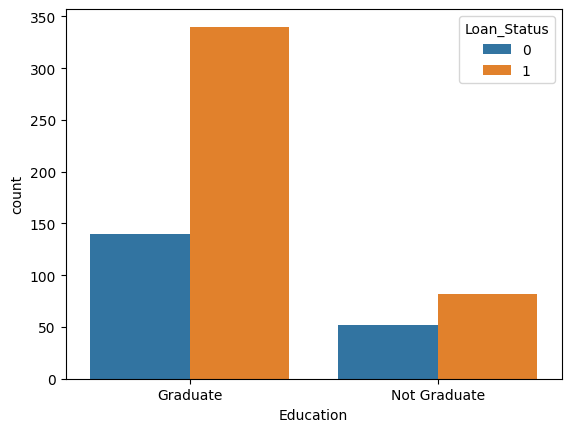

In [22]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

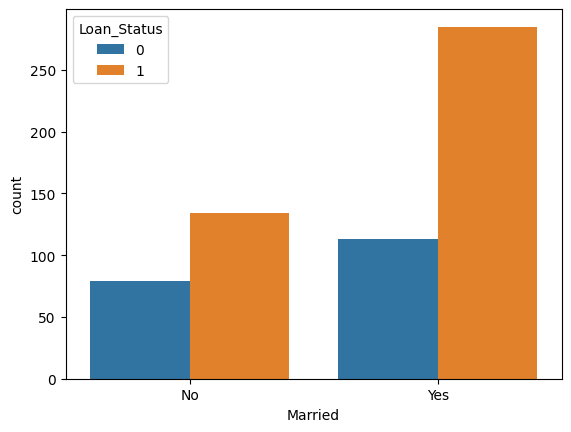

In [23]:
# marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

In [24]:
# convert categorical columns to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

/tmp/ipython-input-24-2432111705.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},


In [25]:
loan_dataset.head()

Loan_ID  Gender  Married Dependents  Education  Self_Employed  \
0  LP001002     1.0      0.0          0          1            0.0   
1  LP001003     1.0      1.0          1          1            0.0   
2  LP001005     1.0      1.0          0          1            1.0   
3  LP001006     1.0      1.0          0          0            0.0   
4  LP001008     1.0      0.0          0          1            0.0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Property_Area  Loan_Status  
0             1.0              2            1  
1             1.0              0            0  
2             1.0              2            1  
3             1.0              2            1  
4             1.0              2            1

In [26]:
# separating the data and label
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

In [27]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0       1.0      0.0          0          1            0.0             5849   
1       1.0      1.0          1          1            0.0             4583   
2       1.0      1.0          0          1            1.0             3000   
3       1.0      1.0          0          0            0.0             2583   
4       1.0      0.0          0          1            0.0             6000   
..      ...      ...        ...        ...            ...              ...   
609     0.0      0.0          0          1            0.0             2900   
610     1.0      1.0          4          1            0.0             4106   
611     1.0      1.0          1          1            0.0             8072   
612     1.0      1.0          2          1            0.0             7583   
613     0.0      0.0          0          1            1.0             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [28]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(614, 11) (552, 11) (62, 11)


Training the model:

Support Vector Machine Model

In [30]:
classifier = svm.SVC(kernel='linear')

In [35]:
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Train classifier
classifier = SVC()
classifier.fit(X_train_imputed, Y_train)

# Predict
X_train_prediction = classifier.predict(X_train_imputed)
training_accuracy = accuracy_score(Y_train, X_train_prediction)

print("Training Accuracy:", training_accuracy)


Training Accuracy: 0.6938405797101449


In [38]:
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Train classifier
classifier = SVC()
classifier.fit(X_train_imputed, Y_train)

# Predict
X_train_prediction = classifier.predict(X_train_imputed)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

# Print accuracy
print('Accuracy on training data :', training_data_accuracy)


Accuracy on training data : 0.6938405797101449


In [40]:
# Predict on test data
X_test_imputed = imputer.transform(X_test)  # if you used imputer on X_train

X_test_prediction = classifier.predict(X_test_imputed)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

print("Accuracy on test data:", test_data_accuracy)


Accuracy on test data: 0.6774193548387096
